In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost
import sys
sys.path.append("./skynet/bf/src/scripts/")
import xgboost_ohlc
import utils
import numpy as np
import seaborn as sns
import talib
import datetime
import requests
import time
%matplotlib inline

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 500)
pd.options.display.precision = 10

In [ ]:
version = '1100'
data_size = 5000
test = 0.2
test_size = data_size*test
test_size = 1000

In [23]:
hour = pd.read_csv('skynet/bf/data/processed/hour.csv')
data_columns = ['MACDS/O','UP','FirstUP','C/O','C-1/C','H/O','L/O']
target_column = 'Target_C/O'
backtest_columns = ['timestamp','Target_Close','Target_Open','Close','Open','Target_UP']

hour_for_ml = hour[data_columns+[target_column]+backtest_columns].dropna()
train = hour_for_ml[-data_size:-test_size]
test = hour_for_ml[-test_size:]
backtest = hour_for_ml[-test_size:]
all_data = hour_for_ml[-data_size:]

data_train = train[data_columns]
data_test = test[data_columns]


target_train = train[target_column]
target_test = test[target_column]


xgbr = xgboost_ohlc.r_fit(data_train, target_train)

predict = xgbr.predict(data_test)
p = predict >= 1.00000
result = (p == (target_test.values >= 1.0000))
print(result.mean())

xgbr_all_data = xgboost_ohlc.r_fit(all_data[data_columns],all_data[target_column])
train.to_csv("skynet/bf/model/T_"+version+"/train.csv")
test.to_csv("skynet/bf/model/T_"+version+"/test.csv")
backtest.to_csv("skynet/bf/model/T_"+version+"/backtest.csv")
pickle.dump(xgbr_all_data, open("skynet/bf/model/T_"+version+"/xgbr.pickle", "wb"))
with open("skynet/bf/model/T_"+version+"/spec.txt", mode="w") as txt:
    txt.write(str(datetime.datetime.now())+'\n')
    txt.write('data_columns: '+str(data_columns)+"\n")
    txt.write('target_column: '+str(target_column)+"\n")
    txt.write('simplescore: '+str(result.mean())+"\n")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.1s finished


0.745
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s finished


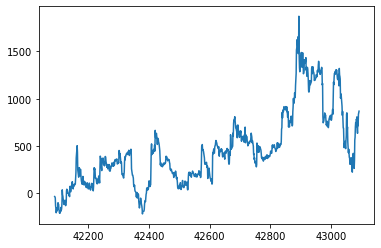

In [22]:
plt.plot((0.01*(p*2-1)*(backtest['Target_Close']-backtest['Target_Open'])-1).cumsum())

In [19]:
(backtest['Target_UP'] == (p*2-1)).mean()

0.497

In [16]:
1000/24

41.666666666666664

In [52]:
#########################################
#########################################
#########################################

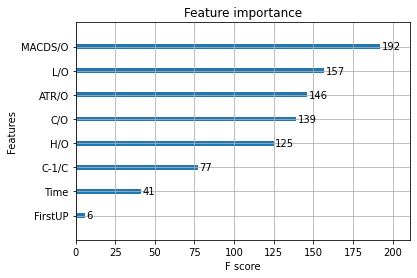

In [20]:
xgboost.plot_importance(xgbr)